In [1]:
"foo" + "42"

'foo42'

In [2]:
"foo" + 42

TypeError: Can't convert 'int' object to str implicitly

In [3]:
str(42)

'42'

In [4]:
repr(42)

'42'

In [5]:
"foo{}".format(42)

'foo42'

In [6]:
"foo{} {}".format(4, 2)

'foo4 2'

In [7]:
"foo{1} {0}".format(4, 2)

'foo2 4'

In [8]:
"Datum: {tag}. {monat} 1940".format(monat="Dezember", tag=21)

'Datum: 21. Dezember 1940'

In [9]:
"Oct {zahl:o} = Dec {zahl:d}".format(zahl=25)

'Oct 31 = Dec 25'

In [10]:
print("Zahl: ", 42)

Zahl:  42


In [11]:
print("Zahl: %d" % 42)

Zahl: 42


In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

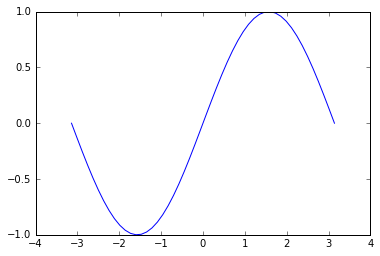

In [13]:
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)
plt.plot(x, y)

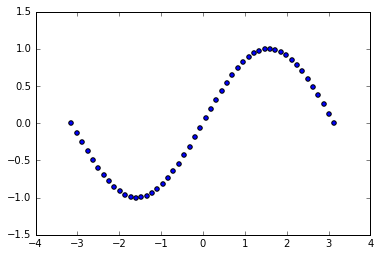

In [14]:
plt.scatter(x, y)

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
x = np.linspace(-1, 1, 50)

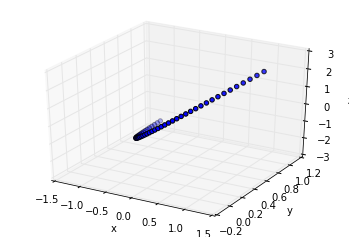

In [19]:
fig = plt.figure()
ax = fig.gca(projection= '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, x**2, 2*x)

In [20]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib notebook

<IPython.core.display.Javascript object>


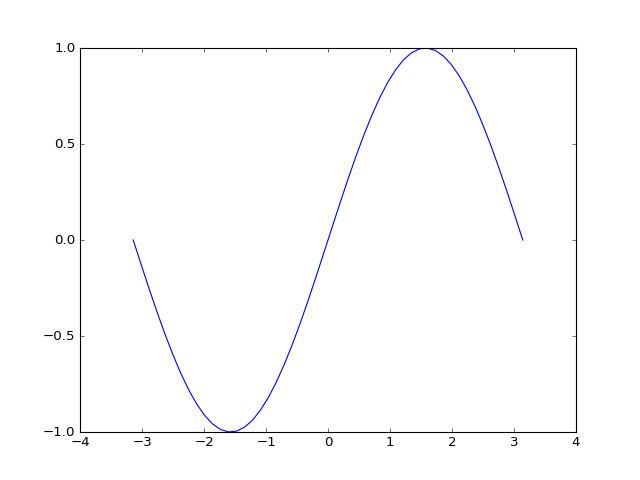

In [23]:
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)
plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


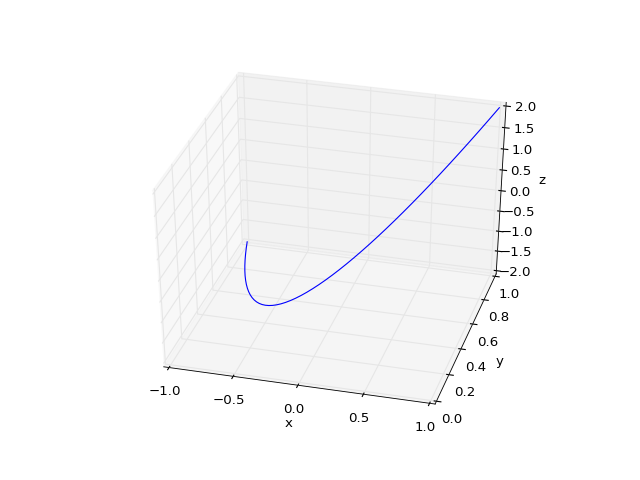

In [24]:
x = np.linspace(-1, 1, 50)
fig = plt.figure()
ax = fig.gca(projection= '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(x, x**2, 2*x)
plt.show()

In [25]:
x = np.arange(1,5)
y = x
np.meshgrid(x, y)

[array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]), array([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]])]

<IPython.core.display.Javascript object>


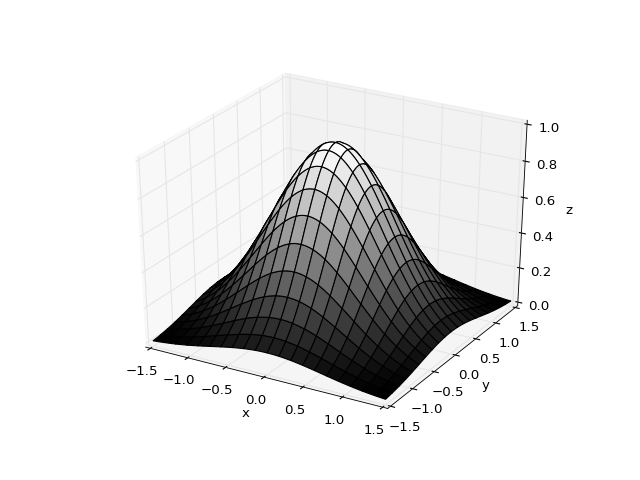

In [26]:
x = np.linspace(-1.5, 1.5, 200)
x, y = np.meshgrid(x, x)
z = np.exp(-x*x-y*y)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, z, cmap=cm.gray)
plt.show()

<IPython.core.display.Javascript object>


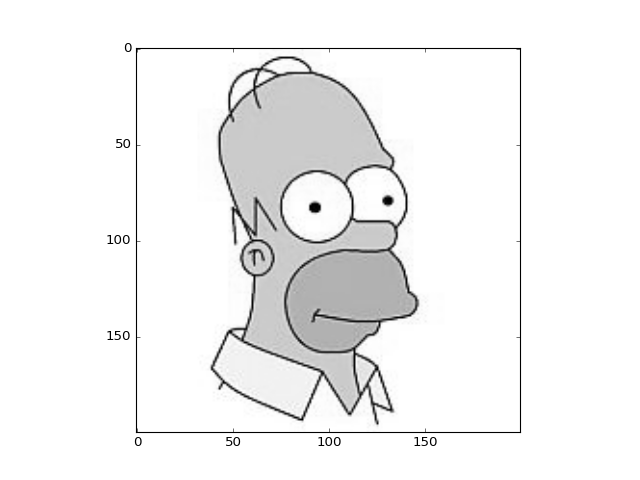

In [27]:
homer = np.array(Image.open("homer_small.jpg").convert("L"))
plt.figure()
plt.imshow(homer, cmap=cm.gray)

<IPython.core.display.Javascript object>


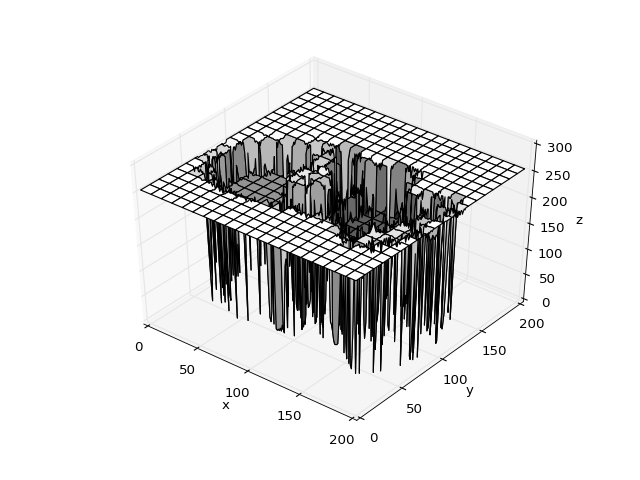

In [28]:
x, y = np.meshgrid(np.arange(200), np.arange(200))
z = homer[x, y]

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, z, cmap=cm.gray)
plt.show()

In [29]:
%matplotlib inline

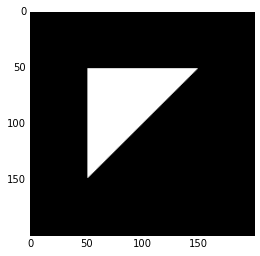

In [30]:
test = np.zeros((200, 200))
for x in range(200):
    for y in range(200):
        if x > 50 and y > 50 and y < 200 - x:
            test[x, y] = 1
plt.figure()
plt.imshow(test, cmap=cm.gray)
plt.show()

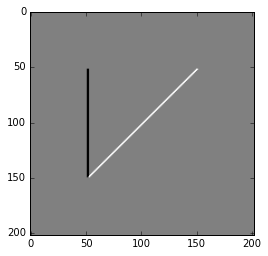

In [31]:
from scipy.signal import convolve2d

filterX = np.zeros((3,3))
filterX[1,0] = -0.5
filterX[1,2] = 0.5
dx = convolve2d(test, filterX)
plt.imshow(dx, cmap=cm.gray)

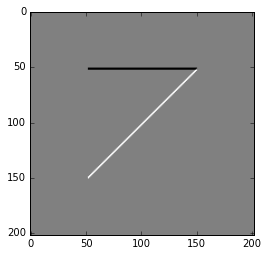

In [32]:
filterY = np.zeros((3,3))
filterY[0,1] = -0.5
filterY[2,1] = 0.5
dy = convolve2d(test, filterY)
plt.imshow(dy, cmap=cm.gray)

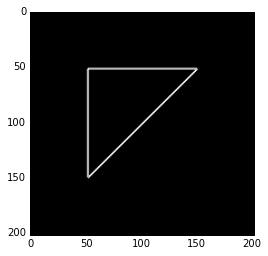

In [33]:
plt.imshow(np.sqrt(dx*dx + dy*dy), cmap=cm.gray)

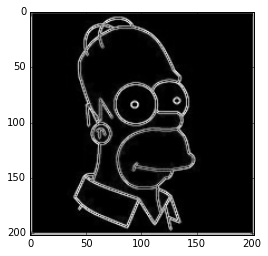

In [34]:
hX = convolve2d(homer, filterX)
hY = convolve2d(homer, filterY)
plt.imshow(np.sqrt(hX*hX + hY*hY), cmap=cm.gray)

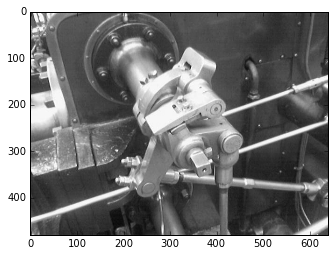

In [35]:
valve = np.array(Image.open("valve.png").convert("L"))
plt.imshow(valve, cmap=cm.gray)

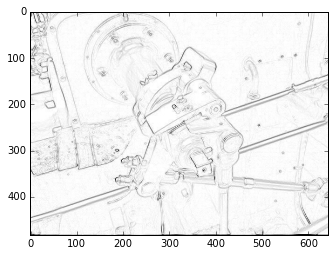

In [36]:
vX = convolve2d(valve, filterX)
vY = convolve2d(valve, filterY)
plt.imshow(np.sqrt(vX*vX + vY*vY), cmap=cm.gray_r)

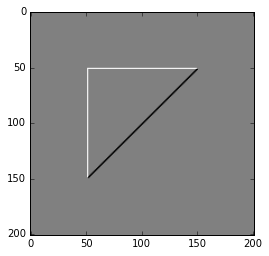

In [37]:
mx = np.array([[1, 0], [0, -1]])
my = np.array([[0, 1], [-1, 0]])
Gx = convolve2d(mx, test)
Gy = convolve2d(my, test)
plt.imshow(Gx, cmap=cm.gray)

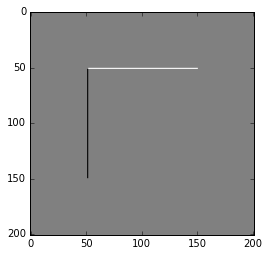

In [38]:
plt.imshow(Gy, cmap=cm.gray)

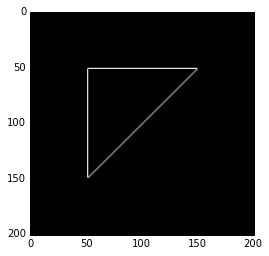

In [39]:
plt.imshow(np.abs(Gx) + np.abs(Gy), cmap=cm.gray)

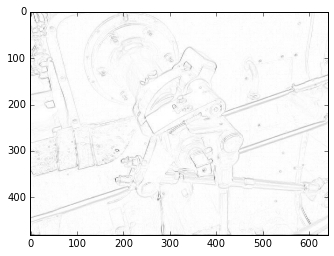

In [40]:
Gx = convolve2d(valve, mx)
Gy = convolve2d(valve, my)
plt.imshow(np.abs(Gx) + np.abs(Gy), cmap=cm.gray_r)

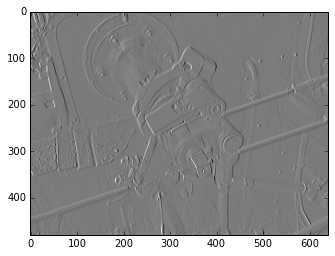

In [41]:
from scipy.ndimage.filters import sobel
valve01 = valve / 255.0
sobX = sobel(valve01, 1)
plt.imshow(sobX, cmap=cm.gray)

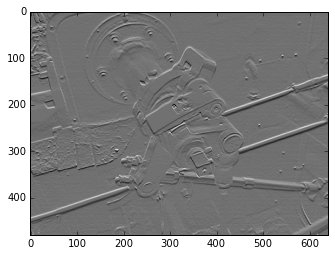

In [42]:
sobY = sobel(valve01, 0)
plt.imshow(sobY, cmap=cm.gray)

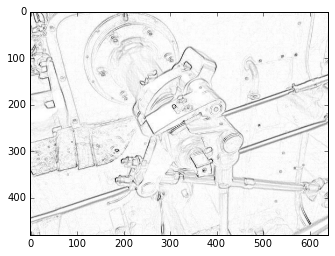

In [43]:
plt.imshow(np.abs(sobX) + np.abs(sobY), cmap=cm.gray_r)

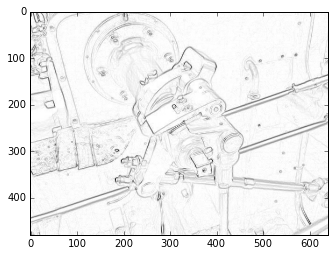

In [44]:
plt.imshow(np.hypot(sobX, sobY), cmap=cm.gray_r)